In [1]:
%load_ext autoreload
%autoreload 2
%autosave 0

from numpy import linspace
from pandas import DataFrame, date_range

from etl import kaggle, rivm
from contagion import Window

plotkw = dict()
plotkw['alpha'] = 0.75
plotkw['color'] = 'kmrygbc'
plotkw['figsize'] = (9, 5)
plotkw['grid'] = True

Autosave disabled


In [2]:
window = Window(0, 0, *linspace(2, 0, 5))
window

Window(0.0, 0.0, 2.0, 1.5, 1.0, 0.5, 0.0)

In [3]:
print(window * 2)
print(window / 2)

Window(0.0, 0.0, 4.0, 3.0, 2.0, 1.0, 0.0)
Window(0.0, 0.0, 1.0, 0.75, 0.5, 0.25, 0.0)


In [4]:
print("gap", window.gap)
print("latency", window.latency)
print("ratio", window.ratio)

gap 5
latency 2
ratio 5.0


In [5]:
window.params

{'delay': 7, 'escape': 0.0, 'fatal': 0.0, 'size': 1.0, 'vax': 0.0}

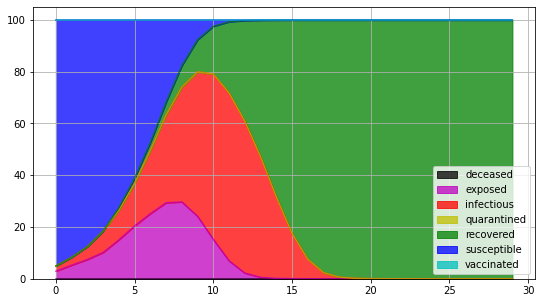

In [6]:
cases = [1, 2, 3]
data = DataFrame(window(size=100).forecast(cases, 30))
data.plot.area(**plotkw)

In [7]:
cprob, ctime = 0.1, 10

real = rivm()
cases = real['confirmed'].shift(-ctime, freq='D').dropna() / cprob
cases.diff().tail()

2020-03-17    11830.0
2020-03-18     9890.0
2020-03-19     7320.0
2020-03-20     6240.0
2020-03-21     1000.0
Freq: D, Name: confirmed, dtype: float64

,deceased,exposed,infectious,quarantined,recovered,susceptible,vaccinated
2021-02-21,79878,0,0,0,11184019,5737140,0
2021-02-22,79878,0,0,0,11184019,5737140,0
2021-02-23,79878,0,0,0,11184019,5737140,0
2021-02-24,79878,0,0,0,11184019,5737140,0
2021-02-25,79878,0,0,0,11184019,5737140,0


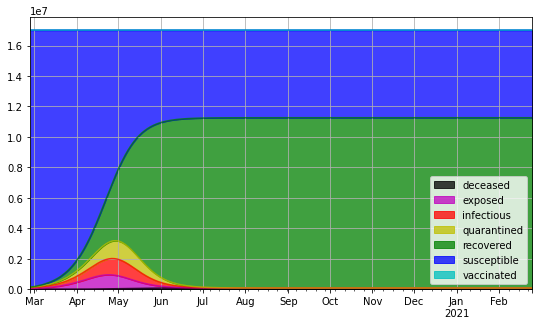

In [34]:
kw = dict()
kw['delay'] = 7
kw['escape'] = 1 / 4
kw['fatal'] = 0.007
kw['size'] = 17_000_000
kw['vax'] = 0

window = Window(0, 0, 0, 0, *linspace(1, 0, 10))
window *= 2.5 / window.ratio

days = 365
index = date_range(real.index.min(), periods=days)
data = window(**kw).forecast(cases, days)
data = DataFrame(data, index=index)
data['deceased'] += real['deceased'].max()

data.plot.area(**plotkw)
data.tail().astype(int)